# Multiple Nearly Optimal Solutions: Optimal Is Not Always the Only Answer

This notebook demonstrates that **optimal solutions** are not always the only answer. Multiple solutions may be nearly optimal, and sometimes nearly optimal solutions are better overall.

Understanding this helps you:
- Recognize that optimal for objectives may not be optimal overall
- Evaluate solutions beyond just objective value
- Consider implementability, robustness, and other practical factors
- Make informed choices among good solutions


## Key Concepts

**Optimal Solution**:
- The best solution according to your objectives
- Found through optimization
- May be difficult to implement or fragile

**Nearly Optimal Solutions**:
- Solutions with objective values very close to optimal (within 1-5%)
- May be easier to implement
- May be more robust to changes
- May be better overall when considering all factors

**Critical insight**: Optimal is best for your objectives, but nearly optimal may be better overall when considering implementability, robustness, and other practical factors.


## Scenario: Production Planning

You need to decide how many units of two products to produce. You want to maximize profit.

**Decision**: How many units of Product A and Product B to produce?

**Optimal solution**: Found through optimization (maximizes profit)

**Nearly optimal solutions**: Close to optimal profit but may have other advantages


## Step 1: Install Required Packages (Colab)

If you're running this notebook in Google Colab, you need to install the `pulp` package first. This cell can be skipped if running locally and the package is already installed.


In [1]:
# Install pulp package (required for optimization)
# This is needed in Google Colab; can be skipped if already installed locally
%pip install pulp -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, value


## Step 3: Find the Optimal Solution

First, let's find the optimal solution:


In [3]:
# Problem inputs
profit_A = 50  # Profit per unit of Product A ($)
profit_B = 40  # Profit per unit of Product B ($)

capacity = 2000  # Total production capacity (units)
labor_hours = 1500  # Available labor hours
labor_per_A = 0.5  # Labor hours per unit of A
labor_per_B = 0.8  # Labor hours per unit of B

demand_A = 1200  # Maximum demand for Product A
demand_B = 1000  # Maximum demand for Product B

# Find optimal solution
model = LpProblem("Production_Optimal", LpMaximize)

produce_A_opt = LpVariable("produce_A_opt", lowBound=0, cat='Continuous')
produce_B_opt = LpVariable("produce_B_opt", lowBound=0, cat='Continuous')

model += profit_A * produce_A_opt + profit_B * produce_B_opt, "Total_Profit"

model += produce_A_opt + produce_B_opt <= capacity, "Capacity_Limit"
model += labor_per_A * produce_A_opt + labor_per_B * produce_B_opt <= labor_hours, "Labor_Limit"
model += produce_A_opt <= demand_A, "Demand_A_Limit"
model += produce_B_opt <= demand_B, "Demand_B_Limit"

model.solve()

optimal_A = value(produce_A_opt)
optimal_B = value(produce_B_opt)
optimal_profit = value(model.objective)

print("OPTIMAL SOLUTION:")
print("=" * 60)
print(f"  Produce {optimal_A:.1f} units of Product A")
print(f"  Produce {optimal_B:.1f} units of Product B")
print(f"  Total Profit: ${optimal_profit:,.2f}")
print(f"\nThis is the OPTIMAL solution (best profit).")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/osx/i64/cbc /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/d99dccfd63dd4db493bfb74d267eb967-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/d99dccfd63dd4db493bfb74d267eb967-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 18 RHS
At line 23 BOUNDS
At line 24 ENDATA
Problem MODEL has 4 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 1 (-3) rows, 2 (0) columns and 2 (-4) elements
0  Obj -0 Dual inf 89.999998 (2)
1  Obj 92000
Optimal - objective value 92000
After Postsolve, objective 92000, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 92000 - 1 iterations time 0.002, Presolve 0.00
Option for prin

## Step 4: Find Nearly Optimal Solutions

Now let's find solutions that are nearly optimal (within a few percent):


In [4]:
# Find solutions that are within 5% of optimal
target_profit_min = optimal_profit * 0.95  # 95% of optimal (within 5%)

# Try different combinations to find nearly optimal solutions
nearly_optimal_solutions = []

# Generate candidate solutions
for a in np.arange(max(0, optimal_A - 200), min(demand_A, optimal_A + 200), 50):
    for b in np.arange(max(0, optimal_B - 200), min(demand_B, optimal_B + 200), 50):
        # Check constraints
        if (a + b <= capacity and 
            labor_per_A * a + labor_per_B * b <= labor_hours and
            a <= demand_A and b <= demand_B):
            profit = profit_A * a + profit_B * b
            if profit >= target_profit_min:
                # Calculate how close to optimal
                pct_of_optimal = (profit / optimal_profit) * 100
                nearly_optimal_solutions.append({
                    'A': a,
                    'B': b,
                    'Profit': profit,
                    '% of Optimal': pct_of_optimal,
                    'Difference from Optimal': optimal_profit - profit,
                    '% Difference': 100 - pct_of_optimal
                })

# Convert to DataFrame and sort
nearly_optimal_df = pd.DataFrame(nearly_optimal_solutions)
nearly_optimal_df = nearly_optimal_df.sort_values('Profit', ascending=False).head(10)

print("NEARLY OPTIMAL SOLUTIONS (within 5% of optimal):")
print("=" * 70)
display(nearly_optimal_df.round(2))

print(f"\nKey Insight:")
print(f"  - Multiple solutions achieve profits within 5% of optimal")
print(f"  - The differences are small (${optimal_profit - nearly_optimal_df['Profit'].min():,.2f} to ${optimal_profit - nearly_optimal_df['Profit'].max():,.2f})")
print(f"  - These solutions may have other advantages")


NEARLY OPTIMAL SOLUTIONS (within 5% of optimal):


,A,B,Profit,% of Optimal,Difference from Optimal,% Difference
7,1150.0,850.0,91500.0,99.46,500.0,0.54
4,1100.0,900.0,91000.0,98.91,1000.0,1.09
2,1050.0,950.0,90500.0,98.37,1500.0,1.63
6,1150.0,800.0,89500.0,97.28,2500.0,2.72
3,1100.0,850.0,89000.0,96.74,3000.0,3.26
1,1050.0,900.0,88500.0,96.20,3500.0,3.80
0,1000.0,950.0,88000.0,95.65,4000.0,4.35
5,1150.0,750.0,87500.0,95.11,4500.0,4.89



Key Insight:
  - Multiple solutions achieve profits within 5% of optimal
  - The differences are small ($4,500.00 to $500.00)
  - These solutions may have other advantages


In [5]:
# Evaluate top solutions on other dimensions
# For simplicity, we'll use heuristics for implementability and robustness

evaluation_results = []

# Add optimal solution
evaluation_results.append({
    'Solution': 'Optimal',
    'A': optimal_A,
    'B': optimal_B,
    'Profit': optimal_profit,
    '% of Optimal': 100.0,
    'Implementability': 'Medium',  # May require changes
    'Robustness': 'Low',  # Sensitive to changes
    'Balance': 'Low'  # Focused on one product
})

# Evaluate top 3 nearly optimal solutions
for idx, row in nearly_optimal_df.head(3).iterrows():
    a, b = row['A'], row['B']
    
    # Heuristic: Implementability (how easy to implement)
    # Solutions closer to current production are easier
    current_A, current_B = 600, 600  # Assume current production
    distance_from_current = abs(a - current_A) + abs(b - current_B)
    if distance_from_current < 100:
        implementability = 'High'
    elif distance_from_current < 300:
        implementability = 'Medium'
    else:
        implementability = 'Low'
    
    # Heuristic: Robustness (how balanced)
    # More balanced solutions are more robust
    balance_ratio = min(a, b) / max(a, b) if max(a, b) > 0 else 0
    if balance_ratio > 0.7:
        robustness = 'High'
    elif balance_ratio > 0.4:
        robustness = 'Medium'
    else:
        robustness = 'Low'
    
    evaluation_results.append({
        'Solution': f'Near-Optimal {len(evaluation_results)}',
        'A': a,
        'B': b,
        'Profit': row['Profit'],
        '% of Optimal': row['% of Optimal'],
        'Implementability': implementability,
        'Robustness': robustness,
        'Balance': 'High' if balance_ratio > 0.7 else 'Medium' if balance_ratio > 0.4 else 'Low'
    })

evaluation_df = pd.DataFrame(evaluation_results)
print("EVALUATION: Optimal vs Nearly Optimal Solutions")
print("=" * 80)
display(evaluation_df.round(2))

print("\nKey Insight:")
print("  - Optimal solution maximizes profit")
print("  - But nearly optimal solutions may be better on other dimensions")
print("  - Managerial judgment is needed to choose the best overall solution")


EVALUATION: Optimal vs Nearly Optimal Solutions


,Solution,A,B,Profit,% of Optimal,Implementability,Robustness,Balance
0,Optimal,1200.0,800.0,92000.0,100.00,Medium,Low,Low
1,Near-Optimal 1,1150.0,850.0,91500.0,99.46,Low,High,High
2,Near-Optimal 2,1100.0,900.0,91000.0,98.91,Low,High,High
3,Near-Optimal 3,1050.0,950.0,90500.0,98.37,Low,High,High



Key Insight:
  - Optimal solution maximizes profit
  - But nearly optimal solutions may be better on other dimensions
  - Managerial judgment is needed to choose the best overall solution


## Step 6: Visualize Multiple Good Solutions

Let's visualize the optimal and nearly optimal solutions:


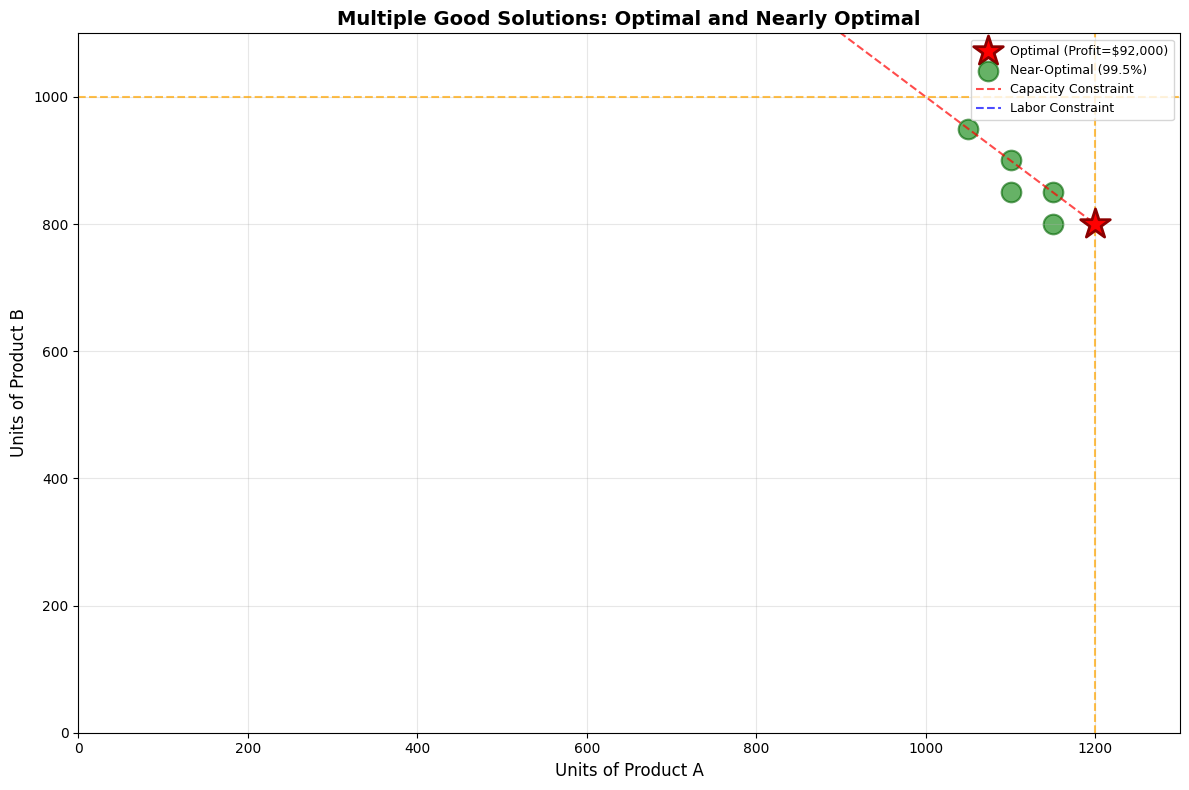


Key Insight:
  - The red star shows the optimal solution
  - The green circles show nearly optimal solutions
  - Multiple good solutions exist - optimal is not the only answer


In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot optimal solution (large red star)
ax.scatter(optimal_A, optimal_B, s=500, marker='*', 
           color='red', edgecolor='darkred', linewidth=2, 
           label=f'Optimal (Profit=${optimal_profit:,.0f})', zorder=10)

# Plot nearly optimal solutions
for idx, row in nearly_optimal_df.head(5).iterrows():
    ax.scatter(row['A'], row['B'], s=200, marker='o', 
               color='green', alpha=0.6, edgecolor='darkgreen', linewidth=1.5,
               label=f"Near-Optimal ({row['% of Optimal']:.1f}%)" if idx == nearly_optimal_df.head(5).index[0] else "")

# Draw constraint lines
A_line = np.linspace(0, demand_A, 100)
B_capacity = capacity - A_line
ax.plot(A_line, B_capacity, 'r--', linewidth=1.5, alpha=0.7, label='Capacity Constraint')

B_labor = (labor_hours - labor_per_A * A_line) / labor_per_B
B_labor = np.maximum(0, B_labor)
ax.plot(A_line, B_labor, 'b--', linewidth=1.5, alpha=0.7, label='Labor Constraint')

ax.axvline(x=demand_A, color='orange', linestyle='--', linewidth=1.5, alpha=0.7)
ax.axhline(y=demand_B, color='orange', linestyle='--', linewidth=1.5, alpha=0.7)

ax.set_xlabel('Units of Product A', fontsize=12)
ax.set_ylabel('Units of Product B', fontsize=12)
ax.set_title('Multiple Good Solutions: Optimal and Nearly Optimal', 
             fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, demand_A + 100)
ax.set_ylim(0, demand_B + 100)

plt.tight_layout()
plt.show()

print("\nKey Insight:")
print("  - The red star shows the optimal solution")
print("  - The green circles show nearly optimal solutions")
print("  - Multiple good solutions exist - optimal is not the only answer")


## Summary: Multiple Nearly Optimal Solutions

**Optimal Solution**:
- Best solution according to your objectives
- Found through optimization
- May be only slightly better than nearly optimal solutions

**Nearly Optimal Solutions**:
- Solutions within 1-5% of optimal profit
- May be easier to implement
- May be more robust to changes
- May be better overall when considering all factors

**Key Insight**: 
- Optimal is best for objectives, but not always the only answer
- Multiple good solutions may exist
- Managerial judgment is needed to choose the best overall solution

**Practical Implication**:
- Don't over-rely on a single optimal solution
- Evaluate optimal and nearly optimal solutions
- Consider implementability, robustness, and other factors
- Choose the solution that is best overall, not just optimal for objectives
